In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

데이터 로딩 및 전처리

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0

모델 정의

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

컴파일 및 학습

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8927 - loss: 0.3426
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9846 - loss: 0.0509
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9897 - loss: 0.0321
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9926 - loss: 0.0226
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9931 - loss: 0.0193


테스트 정확도 출력

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f"Accuracy: {test_acc:.4f}")

Accuracy: 0.9895


이미지 1개 출력

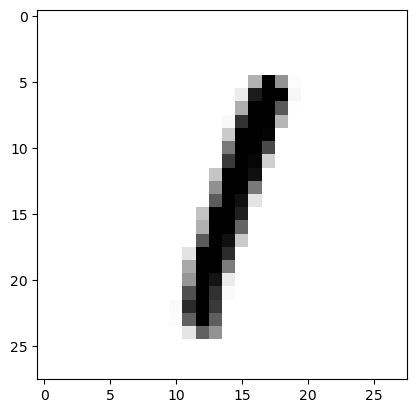

In [11]:
plt.imshow(test_images[5].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')

해당 이미지에 대한 예측

In [12]:
y_pred = model.predict(np.expand_dims(test_images[5], axis=0))
print("예측 결과:", np.argmax(y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
예측 결과: 1
